### Noms et Prénoms du binome:


---

# TP en Watermarking - TP2

---

## Patrick Bas, CNRS, CRIStAL

---


 

## Tatouage par également de spectre et attaques de sécurité

### 2.1 Notations et rappels:

Les notations sont identiques à celles vues en cours. Le procédé d'insertion est le schéma par étalement de spectre vu en cours.

* X = matrice de $N_{i}$ vecteurs originaux de taille $N_{v}$ ($N_{i}$ colonnes, $N_{v}$ lignes). $N_{i}$ représente par exemple le nombre de contenu traités, et $N_{v}$ le nombre de composantes tatouées par contenu. **Note**: chaque colonne de X peut par exemple représenter des composantes d'une image.
* $N_{o}$ représente le nombre de contenus tatoués observés par l'adversaire et utilisés pour construire son attaque
* $N_{i}$ représente le nombre de contenus tatoués utilisés pour calculer pratiquement le taux d'erreur (voir BER)
* Y = matrice de contenus tatoués
* Z = matrice de contenus tatoués et perturbés
* k clé secrète de norme unitaire
* $m_{1}$: bit inséré, converti en +1, -1 
* $\alpha$: paramètre de distorsion
* BER: Bit Error Rate, taux d'erreur binaire ou encore probabilité d'erreur empirique de décodage
* DWR: « Document to Watermark Ratio » $DWR=10\log_{10}(\sum x_{i}^{2}/\sum w_{i}^{2})$, permet de mesurer la distorsion ($DWR=0$ $\Leftrightarrow$ $\sigma_{X}^{2}=\sigma_{W}^{2}$ ). Permet de mesurer la distortion. Distortion nulle $DWR=\infty$, distortion importante $DWR \rightarrow 0$ 

#### Rappels:
* L'objectif du récepteur et de bien décoder $m_{1}$, possiblement en ayant une distortion qui ne soit pas trop importante
* Ici, les objectifs de l'adversaire sont d'estimer la clé k puis d'effacer le message inséré. Pour s'assurer que l'adversaire a bien réussi à estimer la clé, il calculera la correlation normalisée entre le vecteur k et son estimation.

**N'oubliez pas d'exporter votre TP en html lors de sa remise**



In [60]:
%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from sklearn.decomposition import FastICA

## Scénario 1: Attaque à Messages connus, 1 bit
* Mise en route: Quel est le BER cible de l'adversaire ?
* Mettre en place l'attaque liée à ce scénario
* Etudier l'impact de $N_{o}$ et de $\alpha$ sur le BER après attaque

In [61]:
Nv = 100 # Size of the vector
Ni = 10000 # Max number of observations

In [62]:
def ber(Y,m,k):#Compute the Bit Error Rate between message m and the extracted message from Y using key k
    c = np.sign(np.dot(Y.T,k))
    return np.sum(c != m)/np.float(Ni)

def norm_corr(hatk,k):
    hatk = hatk / np.sqrt(np.dot(hatk.T,hatk)) # Normalize
    corrN = np.abs(np.dot(hatk.T,k))/(np.linalg.norm(hatk)*np.linalg.norm(k)) # Compute the Normalised correlation
    return corrN

def do_process(alpha,No):
    
    print('alpha: ',alpha)
    print('No: ',No)

    X = np.random.randn(Nv,Ni) # Generate Ni random host vectors
    k = np.random.randn(Nv,1) # Generate de Watermark
    k = k / np.sqrt(np.dot(k.T,k)) # Normalize the watermark

    m1 = np.ones((Ni,1)) #Scenario with Known Messages: generate only ones, to be changed for the WOA attack!!!

    K = np.dot(k,m1.T) # Generate the matrix of watermarks (each column contains m1_i*k)

    W = alpha*K

    Y = X + W # perform embedding

    DWR = 10*np.log10(Nv/alpha**2) # Set the Document to Watermark Ratio, in dB

    print('DWR: ',DWR,' dB')

    cY = np.sign(np.dot(Y.T,k)) # Computation of the decoded 'bits' (here -1 or +1)
    print('practical bit error rate:')
    print(np.sum(cY != m1)/np.float(Ni)) 

    Y_obs = Y[:,:No]
    # To Do: implement the attack on No observation, i.e. on Y[:,:No]
    # hatk = ???
    hatk = alpha*np.mean(Y_obs,axis=1)
    hatk = hatk / np.sqrt(np.dot(hatk.T,hatk)) # We need to Normalize
    
    corrN = np.abs(np.dot(hatk.T,k))/(np.linalg.norm(hatk)*np.linalg.norm(k)) # Compute the Normalised correlation
    print('Normalised correlation between the true key and the estimated key')
    print(corrN)

    hatk = np.reshape(hatk,(Nv,1))# We need to reshape

    YA = Y - alpha*np.dot(hatk,m1.T) # KMA: perform the removal attack
    print('practical bit error rate after security attack')
    print(ber(YA,m1,k))
    print('\n\n')
    

alpha = 2 # Tune the power of the watermark here

# One example, can be used to draw plots
for No in range(100,2000,100):
    do_process(alpha,No)

alpha:  2
No:  100
DWR:  13.979400086720377  dB
practical bit error rate:
0.022
Normalised correlation between the true key and the estimated key
[0.87845224]
practical bit error rate after security attack
0.4055



alpha:  2
No:  200
DWR:  13.979400086720377  dB
practical bit error rate:
0.0225
Normalised correlation between the true key and the estimated key
[0.94180225]
practical bit error rate after security attack
0.4481



alpha:  2
No:  300
DWR:  13.979400086720377  dB
practical bit error rate:
0.0227
Normalised correlation between the true key and the estimated key
[0.96204401]
practical bit error rate after security attack
0.4714



alpha:  2
No:  400
DWR:  13.979400086720377  dB
practical bit error rate:
0.0232
Normalised correlation between the true key and the estimated key
[0.96714974]
practical bit error rate after security attack
0.4782



alpha:  2
No:  500
DWR:  13.979400086720377  dB
practical bit error rate:
0.0218
Normalised correlation between the true key and the 

In [63]:
No = 2000
A = np.linspace(0,4,41)
for alpha in A:
    do_process(alpha,No)

alpha:  0.0
No:  2000
DWR:  inf  dB
practical bit error rate:
0.5
Normalised correlation between the true key and the estimated key
[nan]
practical bit error rate after security attack
1.0



alpha:  0.1
No:  2000
DWR:  40.0  dB
practical bit error rate:
0.4636
Normalised correlation between the true key and the estimated key
[0.29910453]
practical bit error rate after security attack
0.4769



alpha:  0.2
No:  2000
DWR:  33.979400086720375  dB
practical bit error rate:
0.4237
Normalised correlation between the true key and the estimated key
[0.65073561]
practical bit error rate after security attack
0.4745



alpha: 

<ipython-input-62-ec3d2329c64f>:27: RuntimeWarning: divide by zero encountered in double_scalars
  DWR = 10*np.log10(Nv/alpha**2) # Set the Document to Watermark Ratio, in dB
<ipython-input-62-ec3d2329c64f>:39: RuntimeWarning: invalid value encountered in true_divide
  hatk = hatk / np.sqrt(np.dot(hatk.T,hatk)) # We need to Normalize


 0.30000000000000004
No:  2000
DWR:  30.45757490560675  dB
practical bit error rate:
0.375
Normalised correlation between the true key and the estimated key
[0.83605736]
practical bit error rate after security attack
0.4743



alpha:  0.4
No:  2000
DWR:  27.95880017344075  dB
practical bit error rate:
0.3487
Normalised correlation between the true key and the estimated key
[0.87704663]
practical bit error rate after security attack
0.48



alpha:  0.5
No:  2000
DWR:  26.020599913279625  dB
practical bit error rate:
0.3101
Normalised correlation between the true key and the estimated key
[0.92750635]
practical bit error rate after security attack
0.4979



alpha:  0.6000000000000001
No:  2000
DWR:  24.436974992327126  dB
practical bit error rate:
0.2702
Normalised correlation between the true key and the estimated key
[0.94505745]
practical bit error rate after security attack
0.4934



alpha:  0.7000000000000001
No:  2000
DWR:  23.09803919971486  dB
practical bit error rate:
0.2428
Nor

Pour l'attaquant, le BER cible est 0.5 : on ne prédit qu'une fois sur 2, en moyenne, le bon bit, cela signifie qu'il n'y a aucune corrélation entre ce que l'adversaire prédit et la vérité.

Plus No augmente, plus le BER après attaque se rapproche de 0.5, car on prédit mieux k (la corrélation normalisée entre la vraie clé et celle estimée se rapproche de 1).

Il semble que quand alpha augmente, on a aussi une meilleure estimation de k et donc un BER qui se rapproche de 0.5 après l'attaque.

## Scénario 2, Attaque à messages inconnus, 1bit
* Note: la fonction `np.linalg.eig` peut être utilisée pour effectuer une décomposition en valeurs et vecteurs propres.
* Note: pour effacer le message inséré, il conviendra au préalable d'estimer le bit inséré, cela peut se faire via `m_est = np.sign(np.dot(Y.T,hatk))` où `hatk` est la clé estimée
* Mettre en place l'attaque
* Etudier l'impact de $N_{o}$ et de $\alpha$ sur le BER après attaque

2nd Scenario
alpha:  2
No:  100
Normalised correlation between the true key and the estimated key:
0.8824539114421581
bit error rate after security attack
0.3686



alpha:  2
No:  110
Normalised correlation between the true key and the estimated key:
0.8904933058111989
bit error rate after security attack
0.377



alpha:  2
No:  120
Normalised correlation between the true key and the estimated key:
0.8992686968149537
bit error rate after security attack
0.3845



alpha:  2
No:  130
Normalised correlation between the true key and the estimated key:
0.9027644436553315
bit error rate after security attack
0.3866



alpha:  2
No:  140
Normalised correlation between the true key and the estimated key:
0.8917423990154644
bit error rate after security attack
0.3777



alpha:  2
No:  150
Normalised correlation between the true key and the estimated key:
0.9019504078922357
bit error rate after security attack
0.3827



alpha:  2
No:  160
Normalised correlation between the true key and the estim

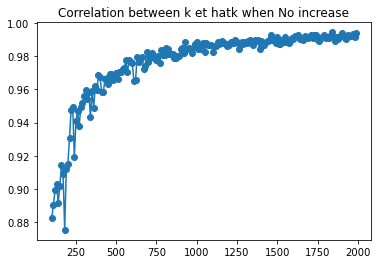

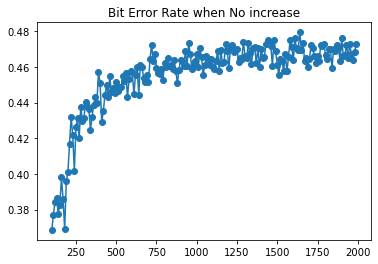

In [64]:
# 2dn scenario, scenario with KMA 
print('2nd Scenario')

def do_process(alpha,No):
    
    print('alpha: ',alpha)
    print('No: ',No)

    X = np.random.randn(Nv,Ni) # Generate Ni random host vectors
    k = np.random.randn(Nv,1) # Generate de Watermark
    k = k / np.sqrt(np.dot(k.T,k)) # Normalize the watermark

    m1 = np.sign(np.random.randn(Ni,1)) #Scenario with unknow messages, first bit

    K = np.dot(k,m1.T) # Generate the matrix of watermarks (each column contains m1_i*k)

    W = alpha*K

    Y = X + W # perform embedding

    Y_obs = Y[:,:No]
    

    eig_val, eig_vec = np.linalg.eig(np.cov(Y_obs))
    
    eig_vec=eig_vec.T
    
    hatk = eig_vec[np.argmax(eig_val)]
    hatk = hatk/np.linalg.norm(hatk)
    
    hatk = np.reshape(hatk,(Nv,1)) #You might need to reshape the estimated key
    corrN = norm_corr(hatk,k)# To ease the writing we use the norm_corr function

    print('Normalised correlation between the true key and the estimated key:')
    print(corrN[0,0])

    m_est = np.sign(np.dot(Y.T,hatk))
    #YA = TO DO 
    YA = Y - alpha*np.dot(hatk,m_est.T) # To change

    print('bit error rate after security attack')
    print(ber(YA,m1,k))
    print('\n\n')
    
    return corrN[0,0], ber(YA,m1,k)


    
alpha = 2 # Tune the power of the watermark here

# One example, can be used to draw plots

COR, BER =[],[]
for No in range(100,2000,10):
    cor, err = do_process(alpha,No)
    COR.append(cor)
    BER.append(err)
plt.plot(range(100,2000,10),COR,'-o')
plt.title('Correlation between k et hatk when No increase')
plt.show()
plt.plot(range(100,2000,10),BER,'-o')
plt.title('Bit Error Rate when No increase')
plt.show()

Il semble que l'impact de No est toujours le même, plus il augmente, plus le BER se rapproche de 0.5 et la correlation se rapproche de 1.

alpha:  0.0
No:  2000
Normalised correlation between the true key and the estimated key:
0.2827219947011074
bit error rate after security attack
0.4958



alpha:  0.1
No:  2000
Normalised correlation between the true key and the estimated key:
0.10875902353532381
bit error rate after security attack
0.462



alpha:  0.2
No:  2000
Normalised correlation between the true key and the estimated key:
0.12485908994259216
bit error rate after security attack
0.4191



alpha:  0.30000000000000004
No:  2000
Normalised correlation between the true key and the estimated key:
0.27300138921949857
bit error rate after security attack
0.3818



alpha:  0.4
No:  2000
Normalised correlation between the true key and the estimated key:
0.31447463759267047
bit error rate after security attack
0.3403



alpha:  0.5
No:  2000
Normalised correlation between the true key and the estimated key:
0.4898374251856372
bit error rate after security attack
0.3075



alpha:  0.6000000000000001
No:  2000
Normalised cor

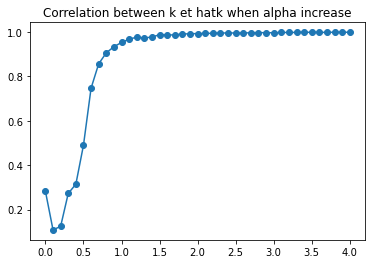

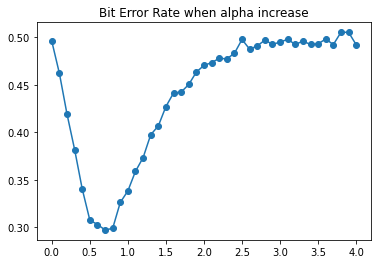

In [65]:
No = 2000
COR, BER =[],[]
A = np.linspace(0,4,41)
for alpha in A:
    cor, err = do_process(alpha,No)
    COR.append(cor)
    BER.append(err)
plt.plot(A,COR,'-o')
plt.title('Correlation between k et hatk when alpha increase')
plt.show()
plt.plot(A,BER,'-o')
plt.title('Bit Error Rate when alpha increase')
plt.show()

De même, plus alpha augmente, plus on l'attaque est efficace, on remarque que pour des alphas très petits, le BER grandit également. Ceci est logique, quand on ne connait pas le message, et que alpha est petit, les deux paquets de points s'entremèlent et on ne peut plus distinguer les deux clusters.

## Scénario 3: Attaque à messages inconnus, 2 bits
* Vérifier que l'attaque précédente ne permet pas d'estimer les deux clés. 
* Estimer au moins l'une des clés utilisée
    * Note: on pourra utiliser l'algorithme `FastICA` pour estimer les deux composantes indépendantes 
    * Pour cela on pourra appeler la fonction fastica en spécifiant que l'analyse en composantes indépendantes s'effectuera sur un sous espace engendré par les *deux premières composantes principales* (`n_components=2`), et en récupérant les colonnes de la matrice de mélange A (obtenue via `ica.mixing_`) estimé par l'algorithme.
    * Vérifier, à l'aide de la corrélation normalisée, que cette méthode permet d'estimer la clé `k1`
* Mettre en place l'attaque qui permet d'effacter un bit sur les deux
* Etudier l'impact de $N_{o}$ et de $\alpha$ sur le BER après attaque

3rd scenario, 2bits
alpha:  2
No:  100
Normalised correlation between the estimated key and k1
[[0.62276296]]
Normalised correlation between the estimated key and k2
[[0.69682845]]
bit error rate after security attack for the first bit
0.1611
bit error rate after security attack for the second bit
0.2467



alpha:  2
No:  200
Normalised correlation between the estimated key and k1
[[0.68629779]]
Normalised correlation between the estimated key and k2
[[0.608119]]
bit error rate after security attack for the first bit
0.1275
bit error rate after security attack for the second bit
0.2908



alpha:  2
No:  300
Normalised correlation between the estimated key and k1
[[0.9385643]]
Normalised correlation between the estimated key and k2
[[0.93652208]]
bit error rate after security attack for the first bit
0.41
bit error rate after security attack for the second bit
0.4193



alpha:  2
No:  400
Normalised correlation between the estimated key and k1
[[0.71447877]]
Normalised correlation betwe

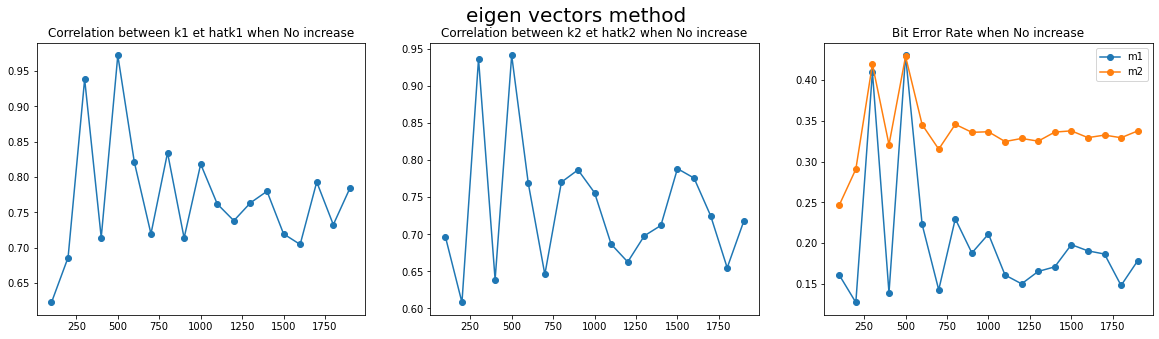

In [66]:
# 3rd scenario, 2 bits
print('3rd scenario, 2bits')

## Attaque précédente :

m1 = np.sign(np.random.randn(Ni,1))#Scenario with unknow messages, first bit
m2 = np.sign(np.random.randn(Ni,1))#Scenario with unknow messages, second bit

k1 = np.random.randn(Nv,1) # Generate de Watermark
k1 = k1 / np.sqrt(np.dot(k1.T,k1)) # Normalize the watermark

k2 = np.random.randn(Nv,1) # Generate de Watermark
k2 = k2 / np.sqrt(np.dot(k2.T,k2)) # Normalize the watermark

def do_process(alpha,No):
    
    print('alpha: ',alpha)
    print('No: ',No)

    X = np.random.randn(Nv,Ni) # Generate Ni random host vectors

    K = np.dot(k1,m1.T) + np.dot(k2,m2.T) # Generate the matrix of watermarks (each column contains m1_i*k)

    W = alpha*K

    Y = X + W # perform embedding

    
    Y_obs = Y[:,:No]
    # TO DO
    
    eig_val, eig_vec = np.linalg.eig(np.cov(Y_obs))
    
    eig_vec=eig_vec.T
    
    ax1 = eig_vec[0]
    ax1 = ax1/np.linalg.norm(ax1)
    ax1 = np.reshape(ax1,(Nv,1))
    
    ax2 = eig_vec[1]
    ax2 = ax2/np.linalg.norm(ax2)
    ax2 = np.reshape(ax2,(Nv,1))

    
    if (norm_corr(ax1,k1)>norm_corr(ax2,k1)):
        hatk_1 = ax1
        hatk_2 = ax2
    else:
        hatk_1 = ax2
        hatk_2 = ax1

    corrN_1 = norm_corr(hatk_1,k1) # Compute the Normalised correlation
    print('Normalised correlation between the estimated key and k1')
    print(corrN_1)

    corrN_2 = norm_corr(hatk_2,k2) # Compute the Normalised correlation
    print('Normalised correlation between the estimated key and k2')
    print(corrN_2)

    m_est1 = np.sign(np.dot(Y.T,hatk_1))
    m_est2 = np.sign(np.dot(Y.T,hatk_2))
    #YA = TO DO 
    YA_1 = Y - alpha*np.dot(hatk_1,m_est1.T)  
    
    
    print('bit error rate after security attack for the first bit')
    print(ber(YA_1,m1,k1))
    
    YA_2 = YA_1 - alpha*np.dot(hatk_2,m_est2.T)  

    print('bit error rate after security attack for the second bit')
    print(ber(YA_2,m2,k2))
    print('\n\n')

    return corrN_1[0,0],corrN_2[0,0],ber(YA_1,m1,k1),ber(YA_2,m2,k2)



COR1,COR2,BER1,BER2 =[],[],[],[]
alpha=2
N = np.arange(100,2000,100)
for No in N:
    cor1,cor2, err1,err2 = do_process(alpha,No)
    COR1.append(cor1)
    COR2.append(cor2)
    BER1.append(err1)
    BER2.append(err2)
plt.figure(figsize=(20,5))
plt.suptitle('eigen vectors method',fontsize=20)
plt.subplot(131)
plt.plot(N,COR1,'-o')
plt.title('Correlation between k1 et hatk1 when No increase')
plt.subplot(132)
plt.plot(N,COR2,'-o')
plt.title('Correlation between k2 et hatk2 when No increase')
plt.subplot(133)
plt.plot(N,BER1,'-o',label = 'm1')
plt.plot(N,BER2,'-o',label= 'm2')
plt.title('Bit Error Rate when No increase')
plt.legend()
plt.show()

Avec l'ancienne méthode, on ne remarque aucune évolution, les coefficients de corrélation tournent autour de 0.75 et les BER pour chaque message ne tendent pas vers 0.5.

3rd scenario, 2bits
alpha:  2
No:  100
Normalised correlation between the estimated key1 and k1
[[0.90663459]]
Normalised correlation between the estimated key2 and k2
[[0.8782015]]
bit error rate after security attack for the first bit
0.3863
bit error rate after security attack for the second bit
0.3698



alpha:  2
No:  200
Normalised correlation between the estimated key1 and k1
[[0.94275427]]
Normalised correlation between the estimated key2 and k2
[[0.91296346]]
bit error rate after security attack for the first bit
0.4257
bit error rate after security attack for the second bit
0.3914



alpha:  2
No:  300
Normalised correlation between the estimated key1 and k1
[[0.93835896]]
Normalised correlation between the estimated key2 and k2
[[0.94675935]]
bit error rate after security attack for the first bit
0.4206
bit error rate after security attack for the second bit
0.4261



alpha:  2
No:  400
Normalised correlation between the estimated key1 and k1
[[0.96247015]]
Normalised correl

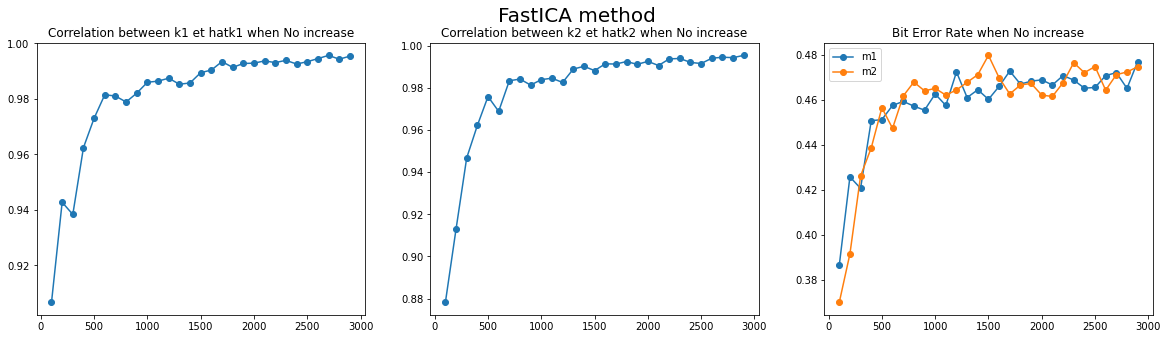

In [67]:
# 3rd scenario, 2 bits
print('3rd scenario, 2bits')

m1 = np.sign(np.random.randn(Ni,1))#Scenario with unknow messages, first bit
m2 = np.sign(np.random.randn(Ni,1))#Scenario with unknow messages, second bit

k1 = np.random.randn(Nv,1) # Generate de Watermark
k1 = k1 / np.sqrt(np.dot(k1.T,k1)) # Normalize the watermark

k2 = np.random.randn(Nv,1) # Generate de Watermark
k2 = k2 / np.sqrt(np.dot(k2.T,k2)) # Normalize the watermark

def do_process(alpha,No):
    
    print('alpha: ',alpha)
    print('No: ',No)

    X = np.random.randn(Nv,Ni) # Generate Ni random host vectors

    K = np.dot(k1,m1.T) + np.dot(k2,m2.T) # Generate the matrix of watermarks (each column contains m1_i*k)

    W = alpha*K

    Y = X + W # perform embedding

    
    Y_obs = Y[:,:No]
    # TO DO
    
    FICA = FastICA(n_components=2)
    S = FICA.fit(Y_obs.T).transform(Y_obs.T)
    A = FICA.mixing_
    
    ax1 = A[:,0]
    ax1 = ax1/np.linalg.norm(ax1)
    ax1 = np.reshape(ax1,(Nv,1))
    
    ax2 = A[:,1]
    ax2 = ax2/np.linalg.norm(ax2)
    ax2 = np.reshape(ax2,(Nv,1))
    
    if (norm_corr(ax1,k1)>norm_corr(ax2,k1)):
        hatk_1 = ax1
        hatk_2 = ax2
    else:
        hatk_1 = ax2
        hatk_2 = ax1

    corrN_1 = norm_corr(hatk_1,k1) # Compute the Normalised correlation for k1
    print('Normalised correlation between the estimated key1 and k1')
    print(corrN_1)

    corrN_2 = norm_corr(hatk_2,k2) # Compute the Normalised correlation for k2
    print('Normalised correlation between the estimated key2 and k2')
    print(corrN_2)

    m_est1 = np.sign(np.dot(Y.T,hatk_1))
    m_est2 = np.sign(np.dot(Y.T,hatk_2))
    #YA = TO DO 
    
    YA_1 = Y - alpha*np.dot(hatk_1,m_est1.T)  
    
    print('bit error rate after security attack for the first bit')
    print(ber(YA_1,m1,k1))

    YA_2 = YA_1- alpha*np.dot(hatk_2,m_est2.T) 
    
    print('bit error rate after security attack for the second bit')
    print(ber(YA_2,m2,k2))
    print('\n\n')

    return corrN_1[0,0],corrN_2[0,0],ber(YA_1,m1,k1),ber(YA_2,m2,k2)



COR1,COR2,BER1,BER2 =[],[],[],[]
alpha=2
N = np.arange(100,3000,100)
for No in N:
    cor1,cor2, err1,err2 = do_process(alpha,No)
    COR1.append(cor1)
    COR2.append(cor2)
    BER1.append(err1)
    BER2.append(err2)
plt.figure(figsize=(20,5))
plt.suptitle('FastICA method',fontsize=20)
plt.subplot(131)
plt.plot(N,COR1,'-o')
plt.title('Correlation between k1 et hatk1 when No increase')
plt.subplot(132)
plt.plot(N,COR2,'-o')
plt.title('Correlation between k2 et hatk2 when No increase')
plt.subplot(133)
plt.plot(N,BER1,'-o',label = 'm1')
plt.plot(N,BER2,'-o',label= 'm2')
plt.title('Bit Error Rate when No increase')
plt.legend()
plt.show()

alpha:  0.0
No:  2000
Normalised correlation between the estimated key1 and k1
[[0.12093274]]
Normalised correlation between the estimated key2 and k2
[[0.0587155]]
bit error rate after security attack for the first bit
0.4949
bit error rate after security attack for the second bit
0.4958



alpha:  0.1
No:  2000
Normalised correlation between the estimated key1 and k1
[[0.15818475]]
Normalised correlation between the estimated key2 and k2
[[0.1144675]]
bit error rate after security attack for the first bit
0.4542
bit error rate after security attack for the second bit
0.4542



alpha:  0.2
No:  2000
Normalised correlation between the estimated key1 and k1
[[0.08251077]]
Normalised correlation between the estimated key2 and k2
[[0.12675968]]
bit error rate after security attack for the first bit
0.4131
bit error rate after security attack for the second bit
0.4252



alpha:  0.30000000000000004
No:  2000
Normalised correlation between the estimated key1 and k1
[[0.36718961]]
Normalised

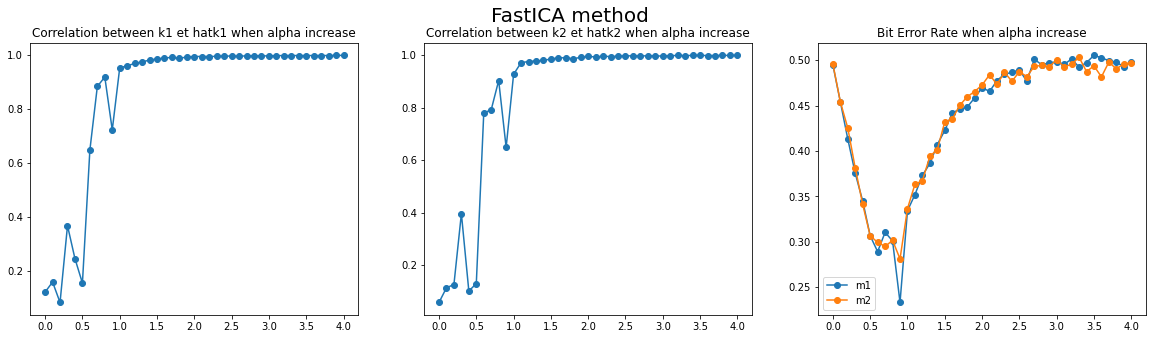

In [74]:
COR1,COR2,BER1,BER2 =[],[],[],[]
No = 2000
A = np.linspace(0,4,41)
for alpha in A:
    cor1,cor2, err1,err2 = do_process(alpha,No)
    COR1.append(cor1)
    COR2.append(cor2)
    BER1.append(err1)
    BER2.append(err2)
plt.figure(figsize=(20,5))
plt.suptitle('FastICA method',fontsize=20)
plt.subplot(131)
plt.plot(A,COR1,'-o')
plt.title('Correlation between k1 et hatk1 when alpha increase')
plt.subplot(132)
plt.plot(A,COR2,'-o')
plt.title('Correlation between k2 et hatk2 when alpha increase')
plt.subplot(133)
plt.plot(A,BER1,'-o',label = 'm1')
plt.plot(A,BER2,'-o',label= 'm2')
plt.title('Bit Error Rate when alpha increase')
plt.legend()
plt.show()

Avec la méthode ICA, on voit ici que les coefficients de correlations tendent vers 1.0 pour les deux clés. Au niveau du BER, il tend bien vers 0.5 pour les deux messages, que ce soit quand alpha ou No augmente. 

On remarque, comme dans le cas à 1 bit, que pour alpha petit, comme les points sont proches, on a un BER proche de 0.5.

## Pour conclure: Etude de la robustesse
* Calculer le taux d'erreur (BER pour Bit Error Rate) théorique après ajout de bruit (voir cours)
* Etudier l'évolution de la robustesse (via le BER) en fonction de la distortion (via alpha) 
* Quel compromis observe-t-on entre la sécurité et la robustesse?

Le BER théorique après attaque est toujours de 0.5, car cela veut dire que le message codé est aléatoire. S'il était de 1, il suffirait d'inverser les bits pour retrouver le message.

Lorsque alpha augmente, le BER augmente, il y'a juste pour alpha très petit qu'il est alors élevé aussi, cela vient du faite que les points se recouvrent, comme dans le cas d'un message d'un bit avec message inconnu.

Pour augmenter la sécurité, il faut prendre un alpha petit, le message sera plus difficile à décoder pour l'adversaire, en revanche, cela diminue la robustesse du message, il sera également plus difficile de le décoder pour le receveur.

Inversement, avec un alpha plus grand, le message sera facilement attaqué mais le message sera robuste.

# Stéganalyse par apprentissage
## Mise en route:
* Récupèrer les caractéristiques ici: https://nextcloud.univ-lille.fr/index.php/s/i6xr4JykqAASapN
* On charge les caractéristiques extraites à partir des images Cover et Stego pour d=3 (dimension de l'histogramme multivarié) et T=3 (seuil)

In [93]:
%matplotlib inline  

from scipy.special import erf
from sklearn.decomposition import FastICA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import SGDClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

In [94]:
cover = np.loadtxt('Features/cover-spam-N=3-T=3.csv')
stego = np.loadtxt('Features/stego-0.20-lsb-spam-N=3-T=3.csv')

In [95]:
print(cover.shape)
print(stego.shape)

(10000, 686)
(10000, 686)


**Quelle est la dimension des caractéristiques ? Pourquoi ?**

Le nombre de caractéristiques est donné par la formule: $2(2T+1)^N$

Appliqué à T=3 et N=3, on obtient 686 caractéristiques.

**Entrainer un classifieur linéaire avec 5000 images en apprentissage et en test (effectuer une permutation pseudo-aléatoire des images avant l'apprentissage)**

In [96]:
X = np.vstack((cover, stego))
y = np.ones(20000)   # label 1 for stego
y[:10000] = 0       # label 0 for cover
data = np.insert(X,0,y,axis=1)

In [97]:
np.random.shuffle(data)
y = data.T[0]
X = np.delete(data, 0, 1)
x_train, x_test = X[:5000], X[5000:]
y_train, y_test = y[:5000], y[5000:]

In [98]:
clf = SGDClassifier(loss = 'log')
#clf = LinearDiscriminantAnalysis()
clf.fit(x_train, y_train)

SGDClassifier(loss='log')

In [99]:
pred_train = clf.predict(x_train)
proba_train = clf.predict_proba(x_train)[:,1]
print('Accuracy score on training set :', "{:.2%}".format(clf.score(x_train, y_train)))

Accuracy score on training set : 87.04%


In [100]:
plt.figure(figsize=(10,10))
pd.crosstab(y_train, pred_train, rownames=['Actual stego'], colnames=['Predicted stego'])

Predicted stego,0.0,1.0
Actual stego,,
0.0,2220,256
1.0,392,2132


<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

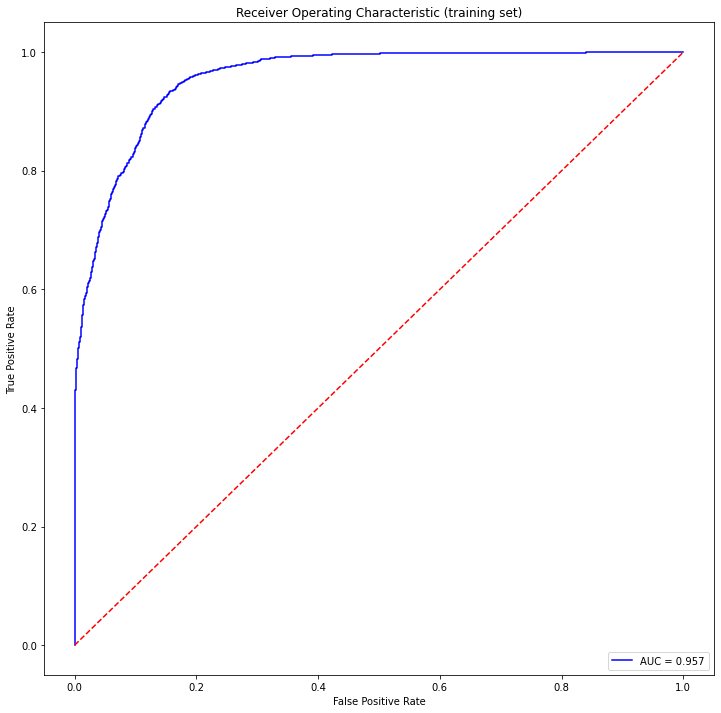

In [101]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train,proba_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(12,12))
plt.title('Receiver Operating Characteristic (training set)')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')        # plus mauvaise courbe
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [102]:
pred_test = clf.predict(x_test)
proba_test = clf.predict_proba(x_test)[:,1]
print('Accuracy score on test set :', "{:.2%}".format(clf.score(x_test, y_test)))

Accuracy score on test set : 85.61%


In [103]:
plt.figure(figsize=(10,10))
pd.crosstab(y_test, pred_test, rownames=['Actual stego'], colnames=['Predicted stego'])

Predicted stego,0.0,1.0
Actual stego,,
0.0,6682,842
1.0,1317,6159


<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

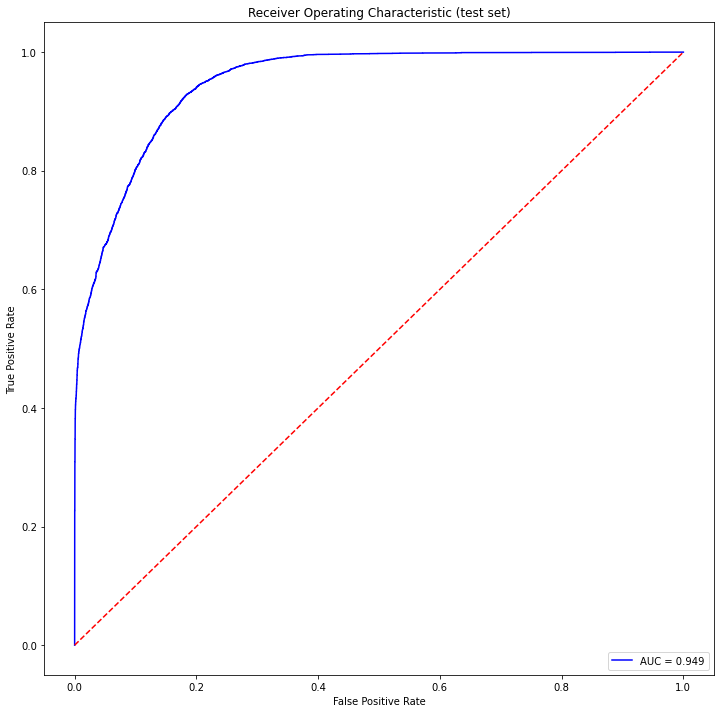

In [104]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,proba_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(12,12))
plt.title('Receiver Operating Characteristic (test set)')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')        # plus mauvaise courbe
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

**Effectuer plusieurs entrainements/test successifs sur des ensembles d'apprentissage et de test différents (permutations différentes), commentez la variabilité**

In [105]:
liste_auc = []
liste_accuracy_score = []
for i in range (10):
    X = np.vstack((cover, stego))
    y = np.ones(20000)   # label 1 for stego
    y[:10000] = 0       # label 0 for cover
    data = np.insert(X,0,y,axis=1)
    np.random.shuffle(data)
    y = data.T[0]
    X = np.delete(data, 0, 1)
    x_train, x_test = X[:5000], X[5000:]
    y_train, y_test = y[:5000], y[5000:]
    clf = SGDClassifier(loss = 'log')
    #clf = LinearDiscriminantAnalysis()
    clf.fit(x_train, y_train)
    liste_accuracy_score.append(clf.score(x_test, y_test))
    proba_test = clf.predict_proba(x_test)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,proba_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    liste_auc.append(roc_auc)

In [106]:
print (np.mean(liste_accuracy_score))
print (np.std(liste_accuracy_score))

0.8522666666666666
0.019128384958252795


In [107]:
print (np.mean(liste_auc))
print (np.std(liste_auc))

0.9545037776395018
0.0027666902044863107


Nous obtenons un accuracy score et un AUC très satisfaisants avec Stochastic Gradient Descent, avec un faible écart type sur les 10 entraînements successifs. De plus, nous évitons le sur-apprentissage. Au contraire, avec un classifieur non linéaire (QDA), les scores sont moins bons et le sur-apprentissage est important.

**Comparer avec les caractéristiques produites pour N = 2 et T = 4 (fournies), expliquer la différence de performance**

In [108]:
cover = np.loadtxt('Features/cover-spam-N=2-T=4.csv')
stego = np.loadtxt('Features/stego-0.20-lsb-spam-N=2-T=4.csv')

In [109]:
liste_auc = []
liste_accuracy_score = []
for i in range (10):
    X = np.vstack((cover, stego))
    y = np.ones(20000)   # label 1 for stego
    y[:10000] = 0       # label 0 for cover
    data = np.insert(X,0,y,axis=1)
    np.random.shuffle(data)
    y = data.T[0]
    X = np.delete(data, 0, 1)
    x_train, x_test = X[:5000], X[5000:]
    y_train, y_test = y[:5000], y[5000:]
    clf = SGDClassifier(loss = 'log')
    #clf = LinearDiscriminantAnalysis()
    clf.fit(x_train, y_train)
    liste_accuracy_score.append(clf.score(x_test, y_test))
    proba_test = clf.predict_proba(x_test)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,proba_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    liste_auc.append(roc_auc)

In [110]:
print (np.mean(liste_accuracy_score))
print (np.std(liste_accuracy_score))

0.6718133333333334
0.02261937812289865


In [111]:
print (np.mean(liste_auc))
print (np.std(liste_auc))

0.7395062805836435
0.006632688955713073


Il y a  beaucoup moins de dimensions pour N=2 et T=4 (162 au lieu de 686 précédement), ce qui explique une performance nettement plus faible au niveau de l'accuracy score et de l'AUC. 